In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
asd=pd.read_csv('/content/drive/MyDrive/train.csv')

In [ ]:
asd

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,...,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,...,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,...,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,1,1,1,1,1,1,1,1,1,...,f,White-European,no,yes,United States,no,13.390868,18 and more,Self,1
796,797,1,1,0,0,1,0,0,0,1,...,f,Asian,no,no,New Zealand,no,9.454201,18 and more,Self,0
797,798,0,0,0,0,0,0,1,0,1,...,m,White-European,yes,no,Jordan,no,6.805509,18 and more,Self,1
798,799,1,1,1,1,1,1,0,1,1,...,f,Middle Eastern,no,yes,United States,no,3.682732,18 and more,Relative,0


In [ ]:
import seaborn as sns

<Axes: xlabel='Class/ASD', ylabel='count'>

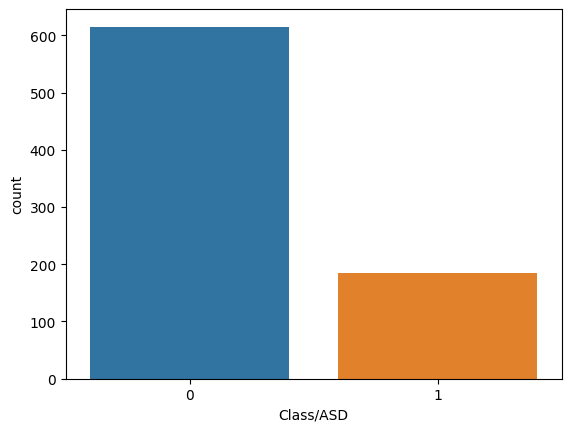

In [ ]:
sns.countplot(x='Class/ASD',data=asd)

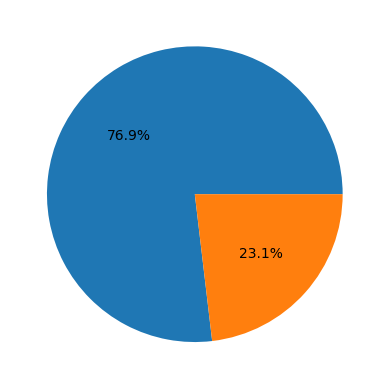

In [ ]:
plt.pie(asd['Class/ASD'].value_counts().values, autopct='%1.1f%%')
plt.show()

<ipython-input-10-b9ad00058c46>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = asd.corr()


<Axes: >

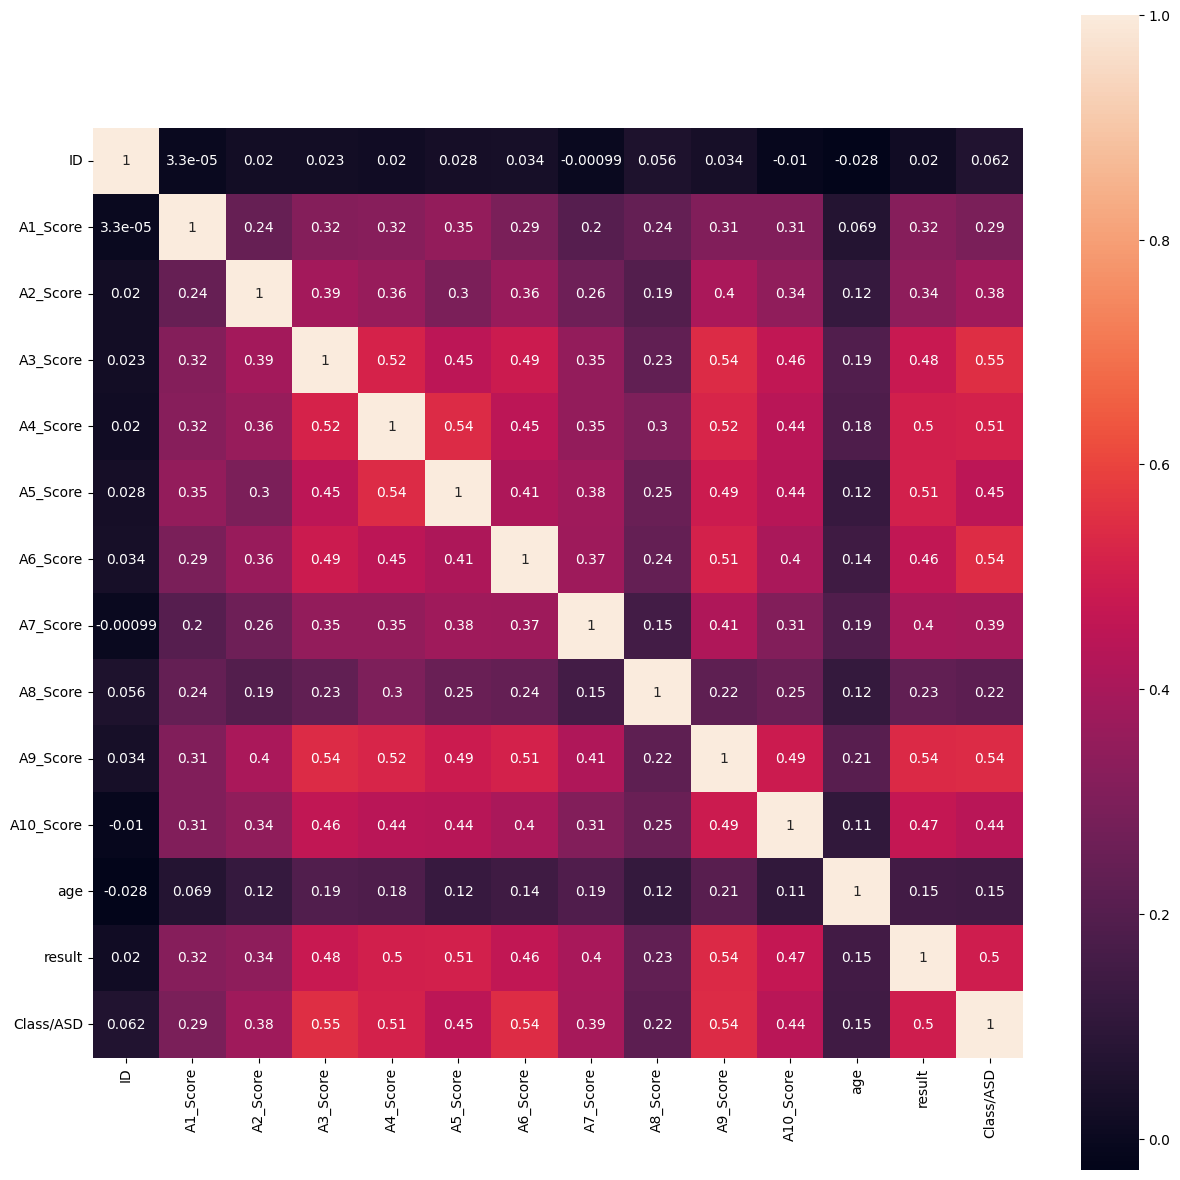

In [ ]:
corr = asd.corr()
plt.figure(figsize = (15,15))
sns.heatmap(data = corr, annot = True, square = True, cbar = True)

In [ ]:
import numpy as np
asd.replace("?", np.nan, inplace = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'White-European'),
  Text(1, 0, 'South Asian'),
  Text(2, 0, 'Black'),
  Text(3, 0, 'Asian'),
  Text(4, 0, 'Middle Eastern '),
  Text(5, 0, 'others'),
  Text(6, 0, 'Latino'),
  Text(7, 0, 'Turkish'),
  Text(8, 0, 'Others'),
  Text(9, 0, 'Hispanic'),
  Text(10, 0, 'Pasifika')])

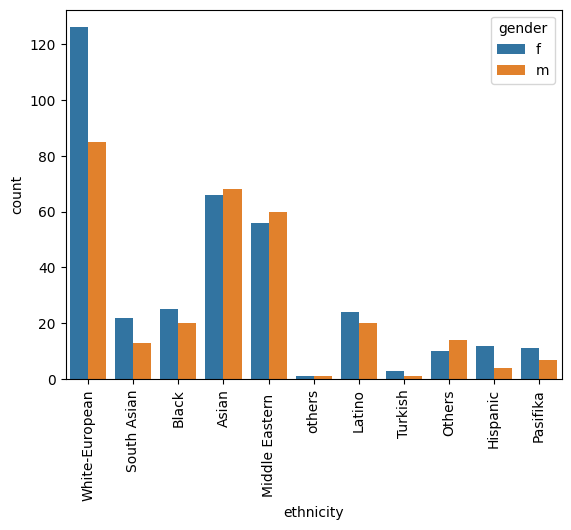

In [ ]:
sns.countplot(x='ethnicity',hue='gender',data=asd)
plt.xticks(rotation=90)

<Axes: xlabel='ethnicity', ylabel='count'>

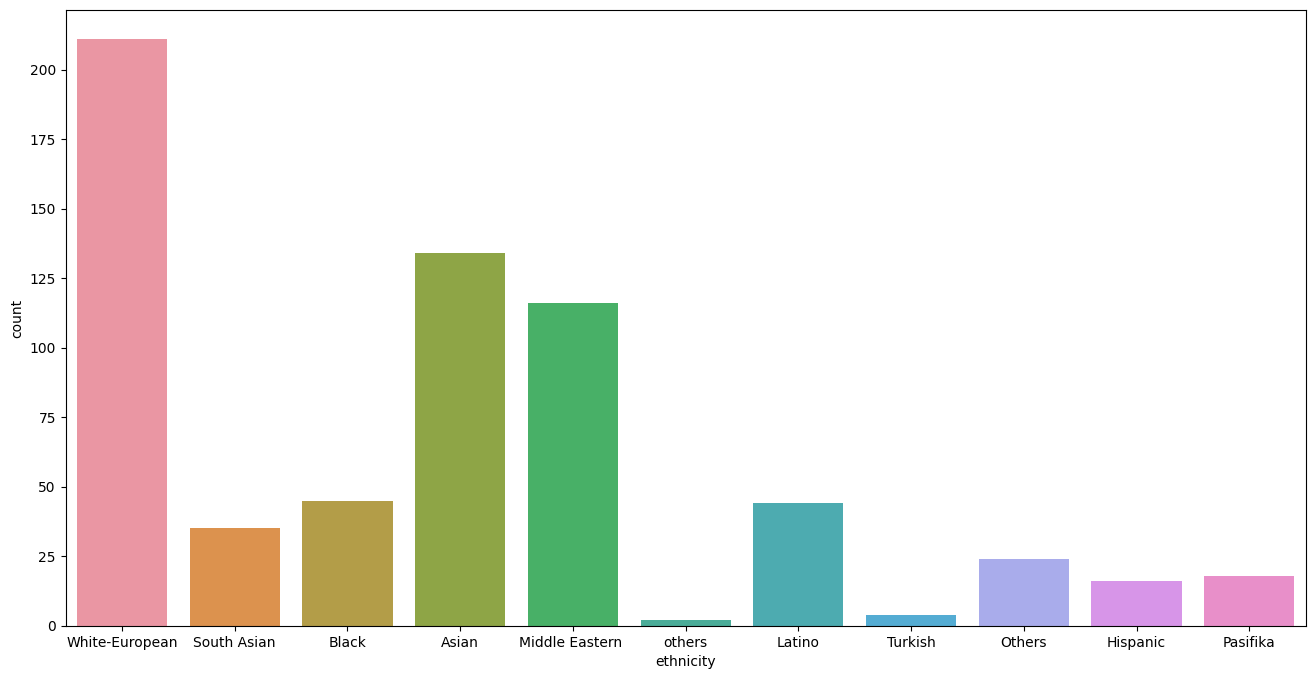

In [ ]:
plt.figure(figsize = (16,8))
sns.countplot(x = 'ethnicity', data = asd)

<ipython-input-21-5049e95292f8>:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,3,i+1)


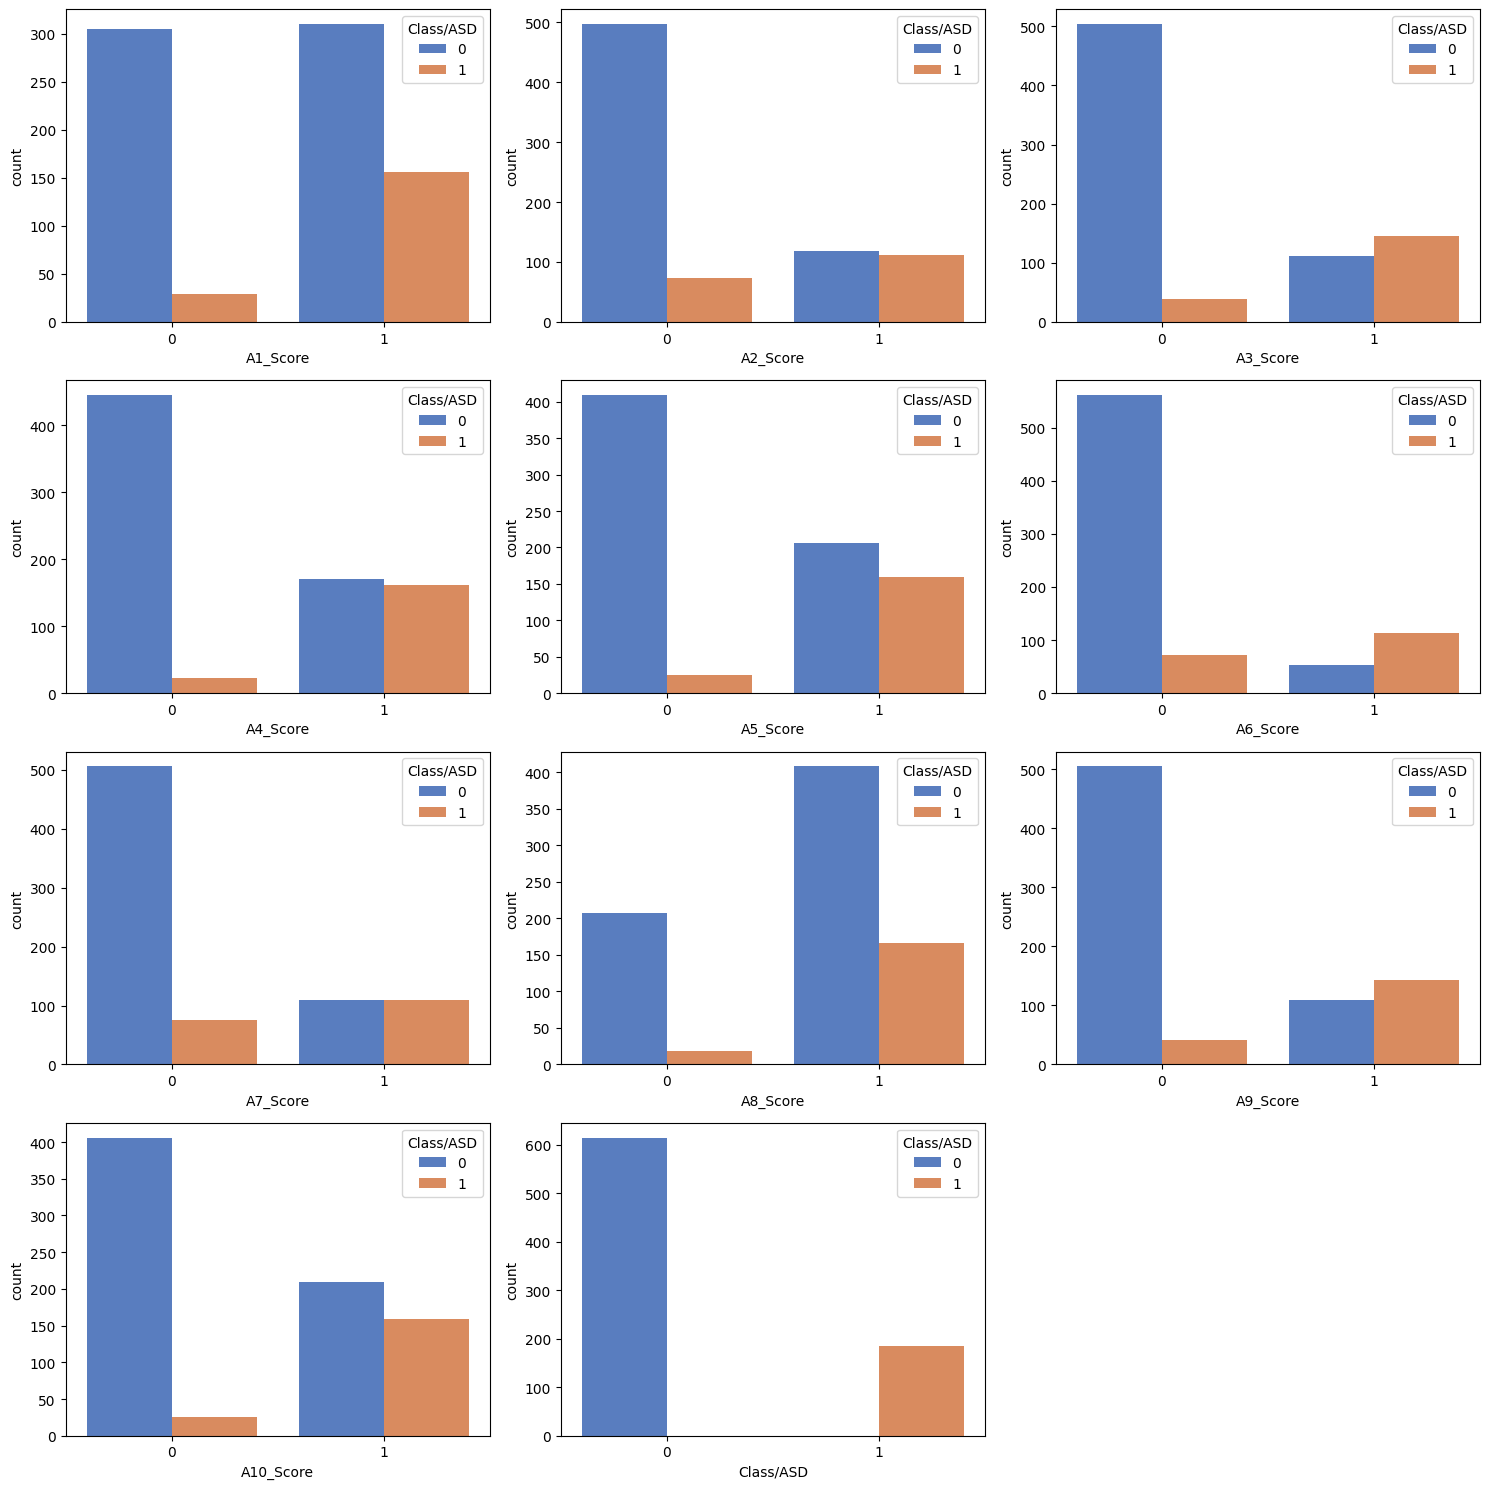

In [ ]:
ints = []
objects = []
floats = []

for col in asd.columns:
  if asd[col].dtype == int:
    ints.append(col)
  elif asd[col].dtype == object:
    objects.append(col)
  else:
    floats.append(col)

ints.remove('ID')
#ints.remove('Class/ASD')

plt.subplots(figsize=(15,15))

for i, col in enumerate(ints):
  plt.subplot(4,3,i+1)
  sns.countplot(x=col, hue='Class/ASD',data=asd,palette="muted")
plt.tight_layout()
plt.show()

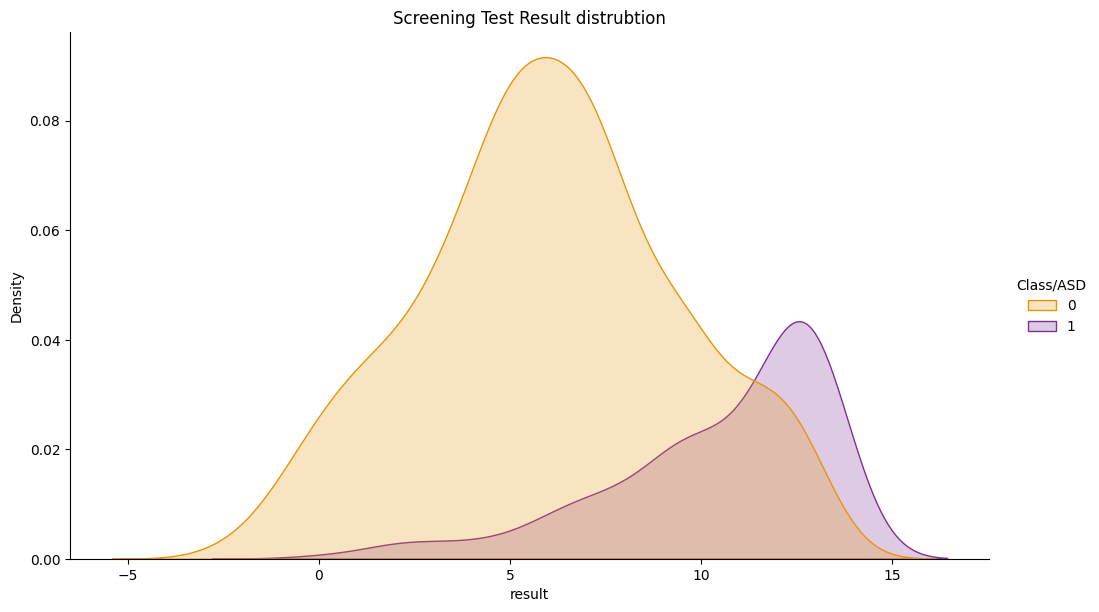

In [ ]:
sns.displot(data=asd,x='result',hue="Class/ASD" ,kind="kde", palette = "CMRmap_r",fill=True,height=6, aspect=1.7) ;
#sns.rugplot(data=age_plot,x='age',hue="Class" , palette= 'brg')
plt.title("Screening Test Result distrubtion")
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-16-93ae5c1d697e>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 3, i+1)


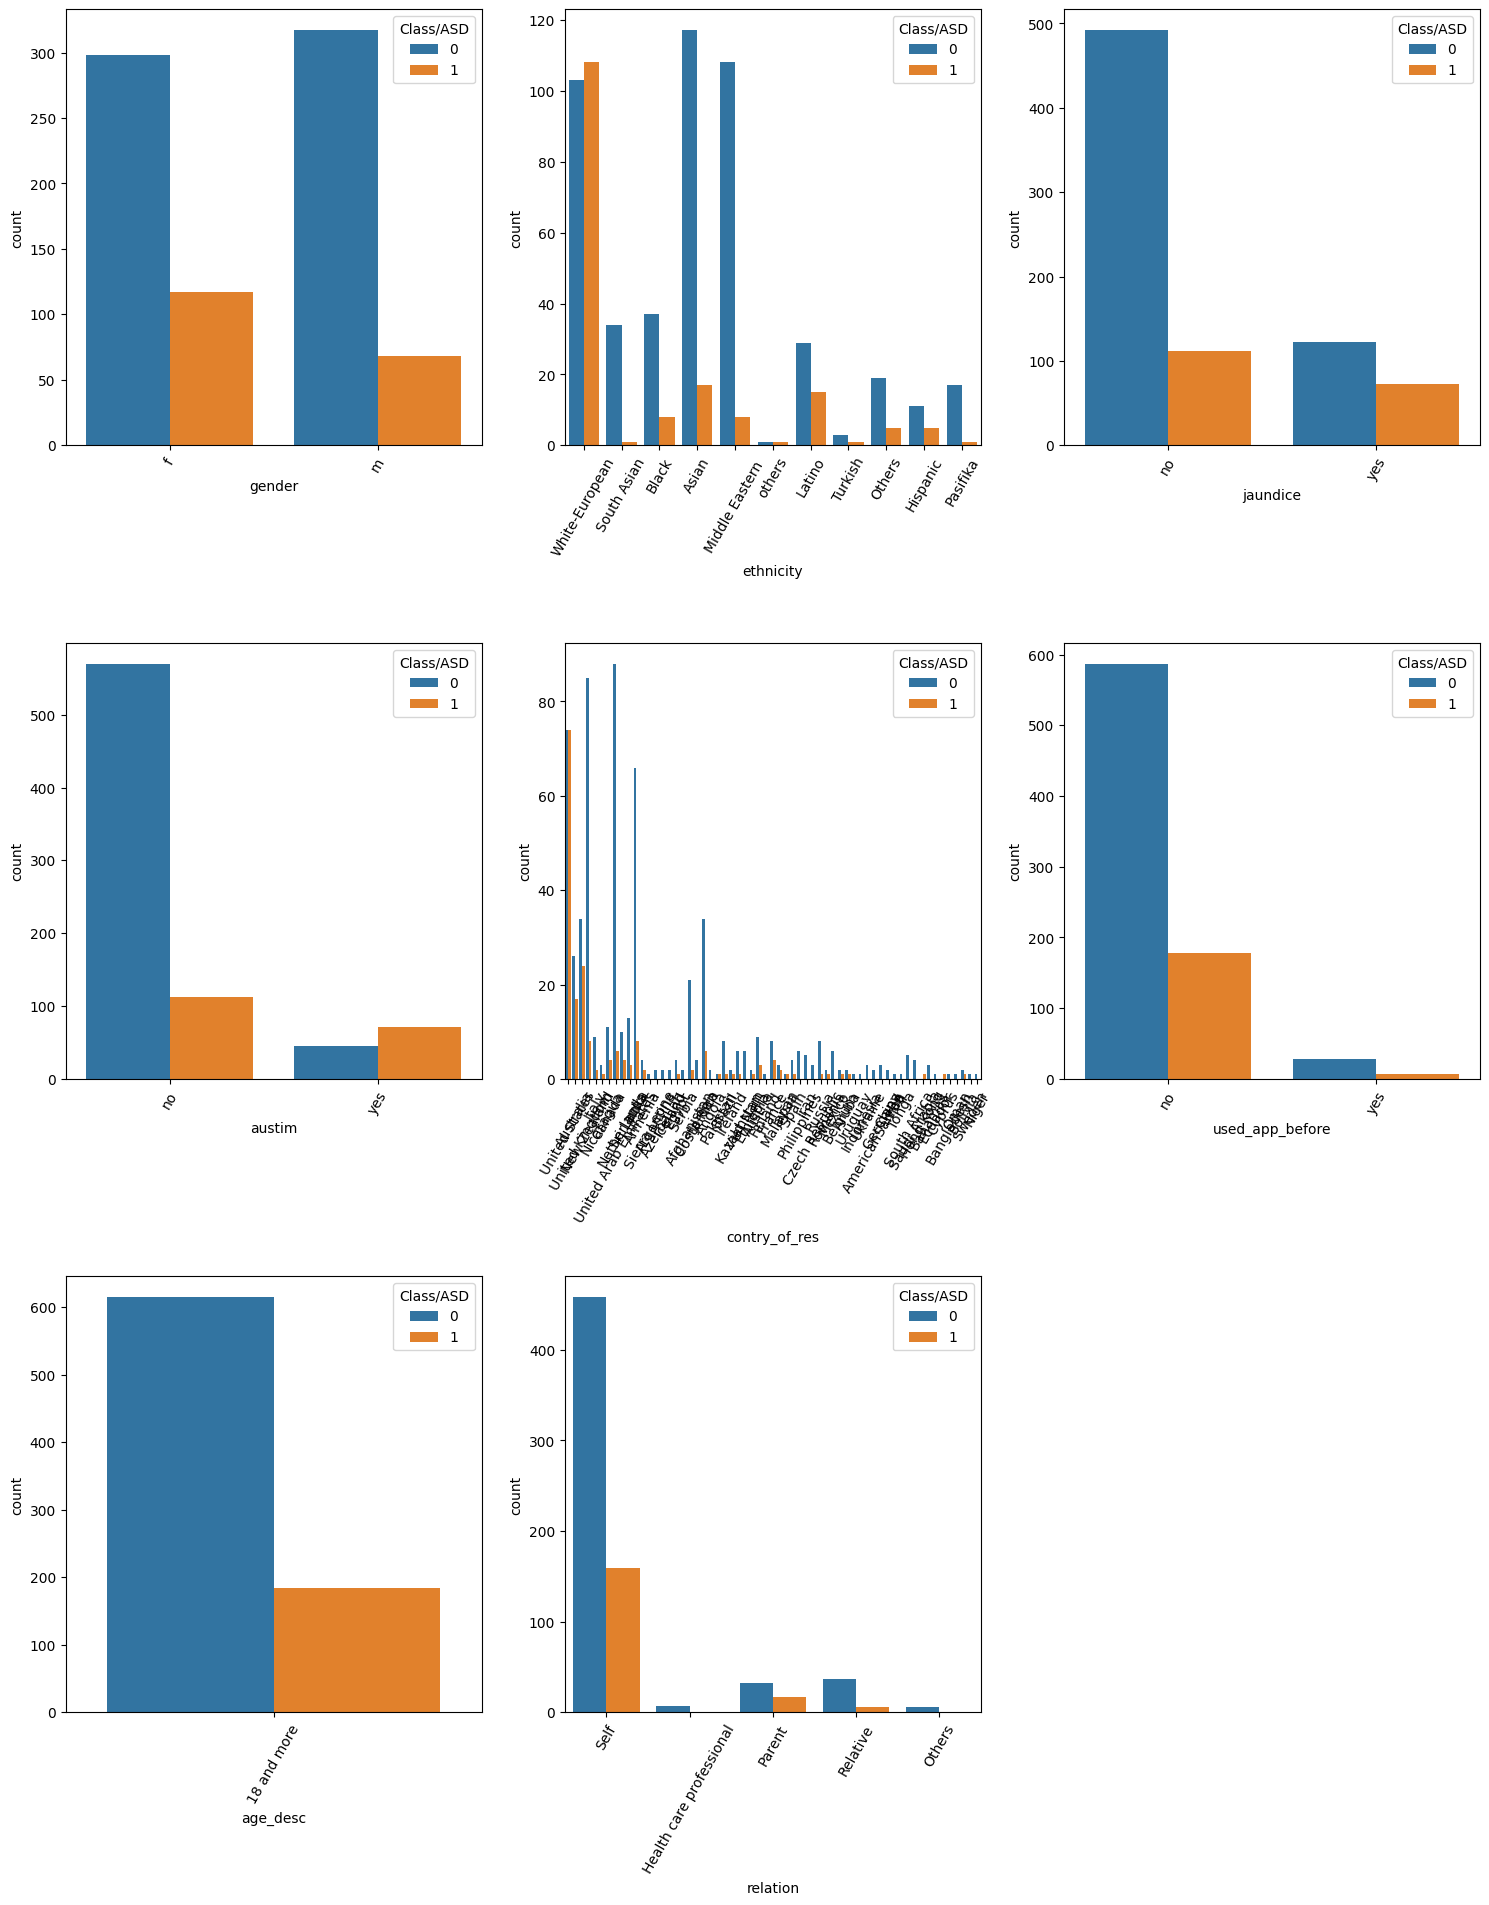

In [ ]:
plt.subplots(figsize=(15, 30))

for i, col in enumerate(objects):
	plt.subplot(5, 3, i+1)
	sns.countplot(x=col, hue='Class/ASD',data=asd)
	plt.xticks(rotation=60)
plt.tight_layout()
plt.show()


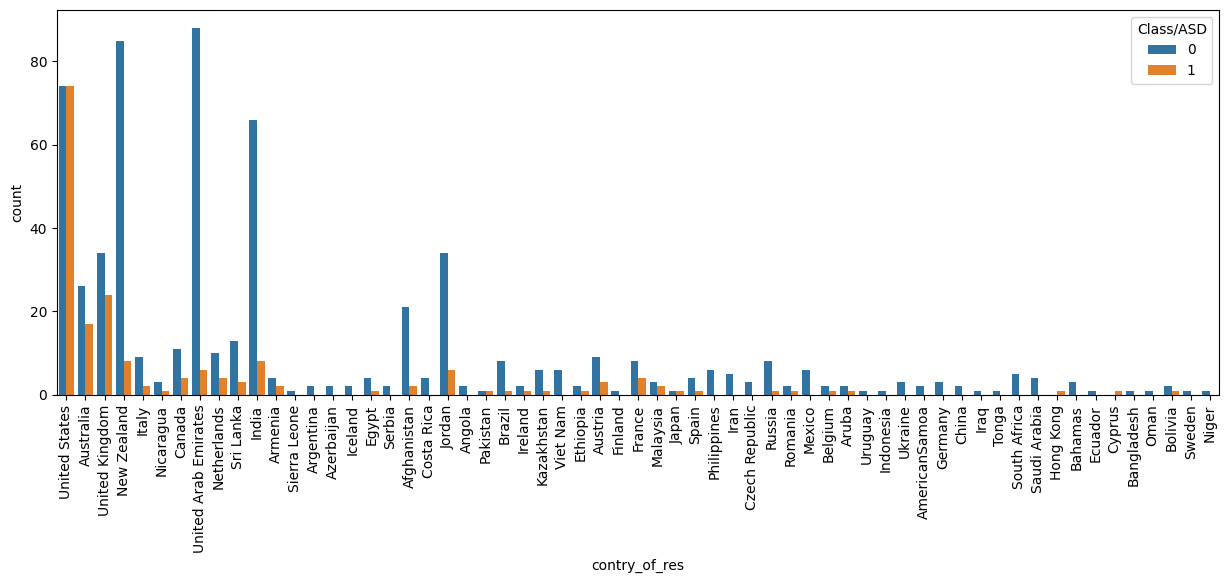

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data=asd, x='contry_of_res', hue='Class/ASD')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# This functions make groups by taking
# the age as a parameter
def convertAge(age):
	if age < 4:
		return 'Toddler'
	elif age < 12:
		return 'Kid'
	elif age < 18:
		return 'Teenager'
	elif age < 40:
		return 'Young'
	else:
		return 'Senior'

asd['ageGroup'] = asd['age'].apply(convertAge)


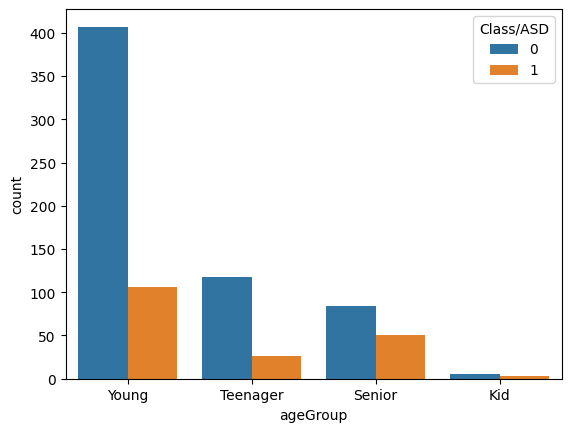

In [ ]:
sns.countplot(x=asd['ageGroup'], hue=asd['Class/ASD'])
plt.show()